In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import seaborn as sns

## Chargement du dataset

In [34]:

california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

##### La variable cible est 'MedInc' dans le datase, renommons-la en 'MedHouseValue' pour plus de clarté et conserver l'ancienne colonne 'MedInc' et la renommer pour éviter la confusion.

In [35]:
df['MedHouseValue'] = california_housing.target
df.rename(columns={'MedInc': 'Original_MedInc'}, inplace=True)
df.head()

,Original_MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


##### Prevoir la structure du dataset

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Original_MedInc  20640 non-null  float64
 1   HouseAge         20640 non-null  float64
 2   AveRooms         20640 non-null  float64
 3   AveBedrms        20640 non-null  float64
 4   Population       20640 non-null  float64
 5   AveOccup         20640 non-null  float64
 6   Latitude         20640 non-null  float64
 7   Longitude        20640 non-null  float64
 8   MedHouseVal      20640 non-null  float64
 9   MedHouseValue    20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


## Nettoyage et prétraitement 

##### Verifier s'il y a des veleurs manquantes

In [37]:
df.isnull().sum()

Original_MedInc    0
HouseAge           0
AveRooms           0
AveBedrms          0
Population         0
AveOccup           0
Latitude           0
Longitude          0
MedHouseVal        0
MedHouseValue      0
dtype: int64

#### Vérification des types de données


In [38]:
df.dtypes

Original_MedInc    float64
HouseAge           float64
AveRooms           float64
AveBedrms          float64
Population         float64
AveOccup           float64
Latitude           float64
Longitude          float64
MedHouseVal        float64
MedHouseValue      float64
dtype: object


#### Gestion des colonnes redondantes ou ajustements de nommage
##### Nous avons identifié une colonne 'MedHouseVal' qui est un duplicata de 'MedHouseValue' et supprimer pour éviter la confusion future et le garder comme notre cible

In [39]:
if 'MedHouseVal' in df.columns and 'MedHouseValue' in df.columns and (df['MedHouseVal'] == df['MedHouseValue']).all():
    df.drop('MedHouseVal', axis=1, inplace=True)
#Colonne 'MedHouseVal' dupliquée et redondante supprimée car identique à 'MedHouseValue'.

#### Nouvelles informations sur le dataset après l'étape de nettoyage/prétraitement :

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Original_MedInc  20640 non-null  float64
 1   HouseAge         20640 non-null  float64
 2   AveRooms         20640 non-null  float64
 3   AveBedrms        20640 non-null  float64
 4   Population       20640 non-null  float64
 5   AveOccup         20640 non-null  float64
 6   Latitude         20640 non-null  float64
 7   Longitude        20640 non-null  float64
 8   MedHouseValue    20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


#### Premières 5 lignes du dataset après nettoyage (si applicable)

In [41]:
df.head()

,Original_MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### EDA : Statistiques descriptives, histogrammes, boxplots, scatter-plots prix vs variables clés, matrice de corrélation.

##### Statistiques descriptives

In [42]:
df.describe()

,Original_MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010



#### Histograms de toutes les caractéristiques

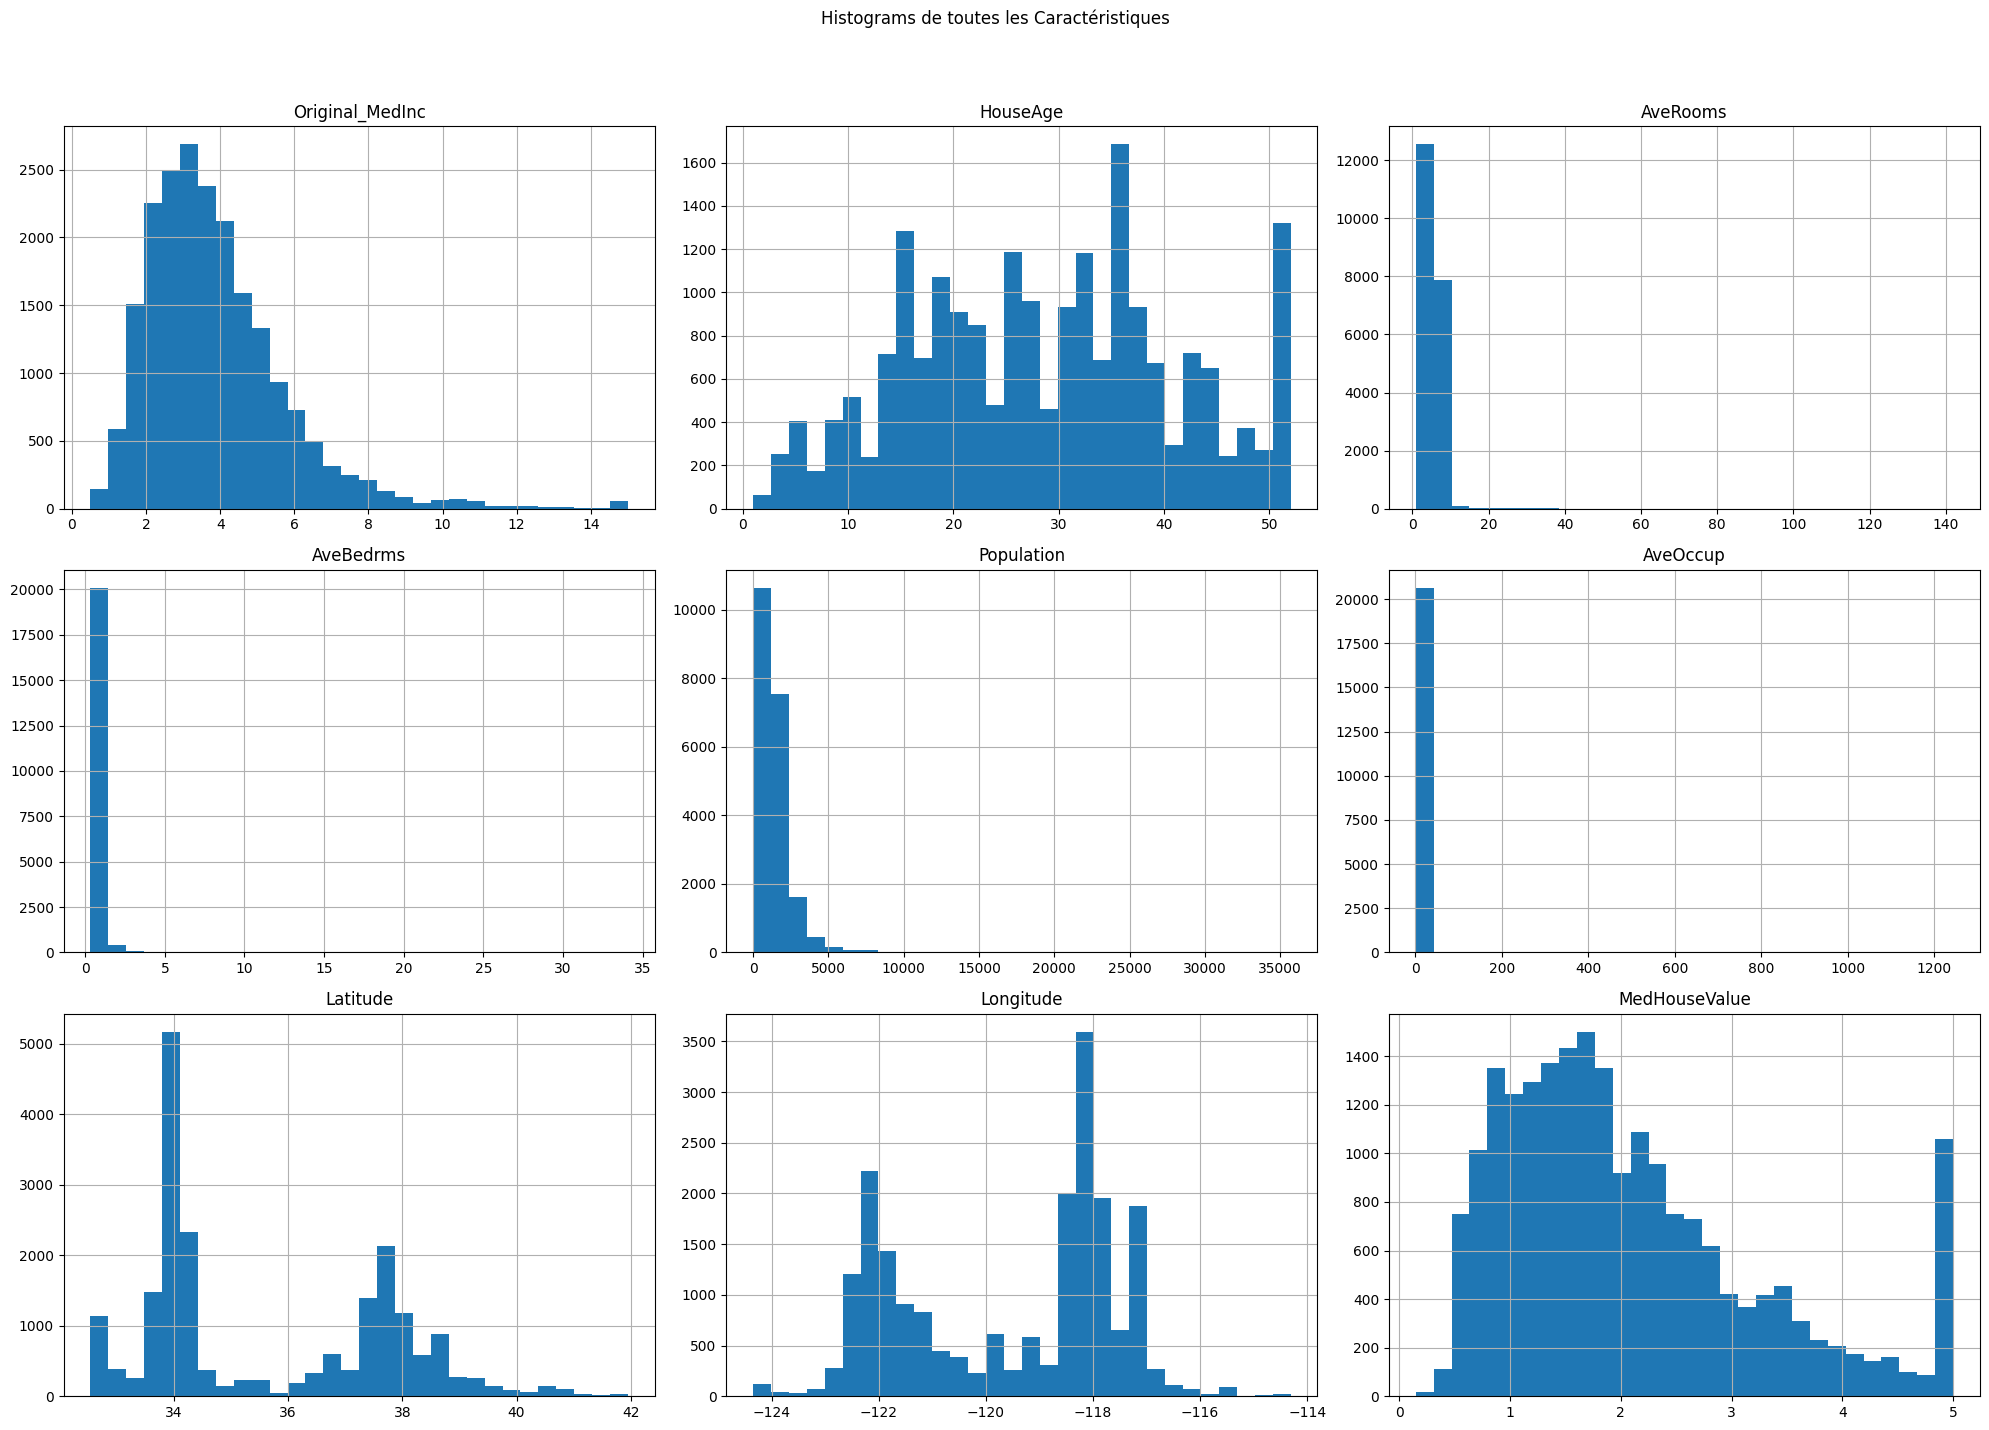

In [43]:
df.hist(bins=30, figsize=(20, 15))
plt.suptitle("Histograms de toutes les Caractéristiques")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajuste l'espace pour le titre
plt.show() # Affiche le graphique et bloque l'exécution


#### Boxplots pour visualiser les distributions et les outlier

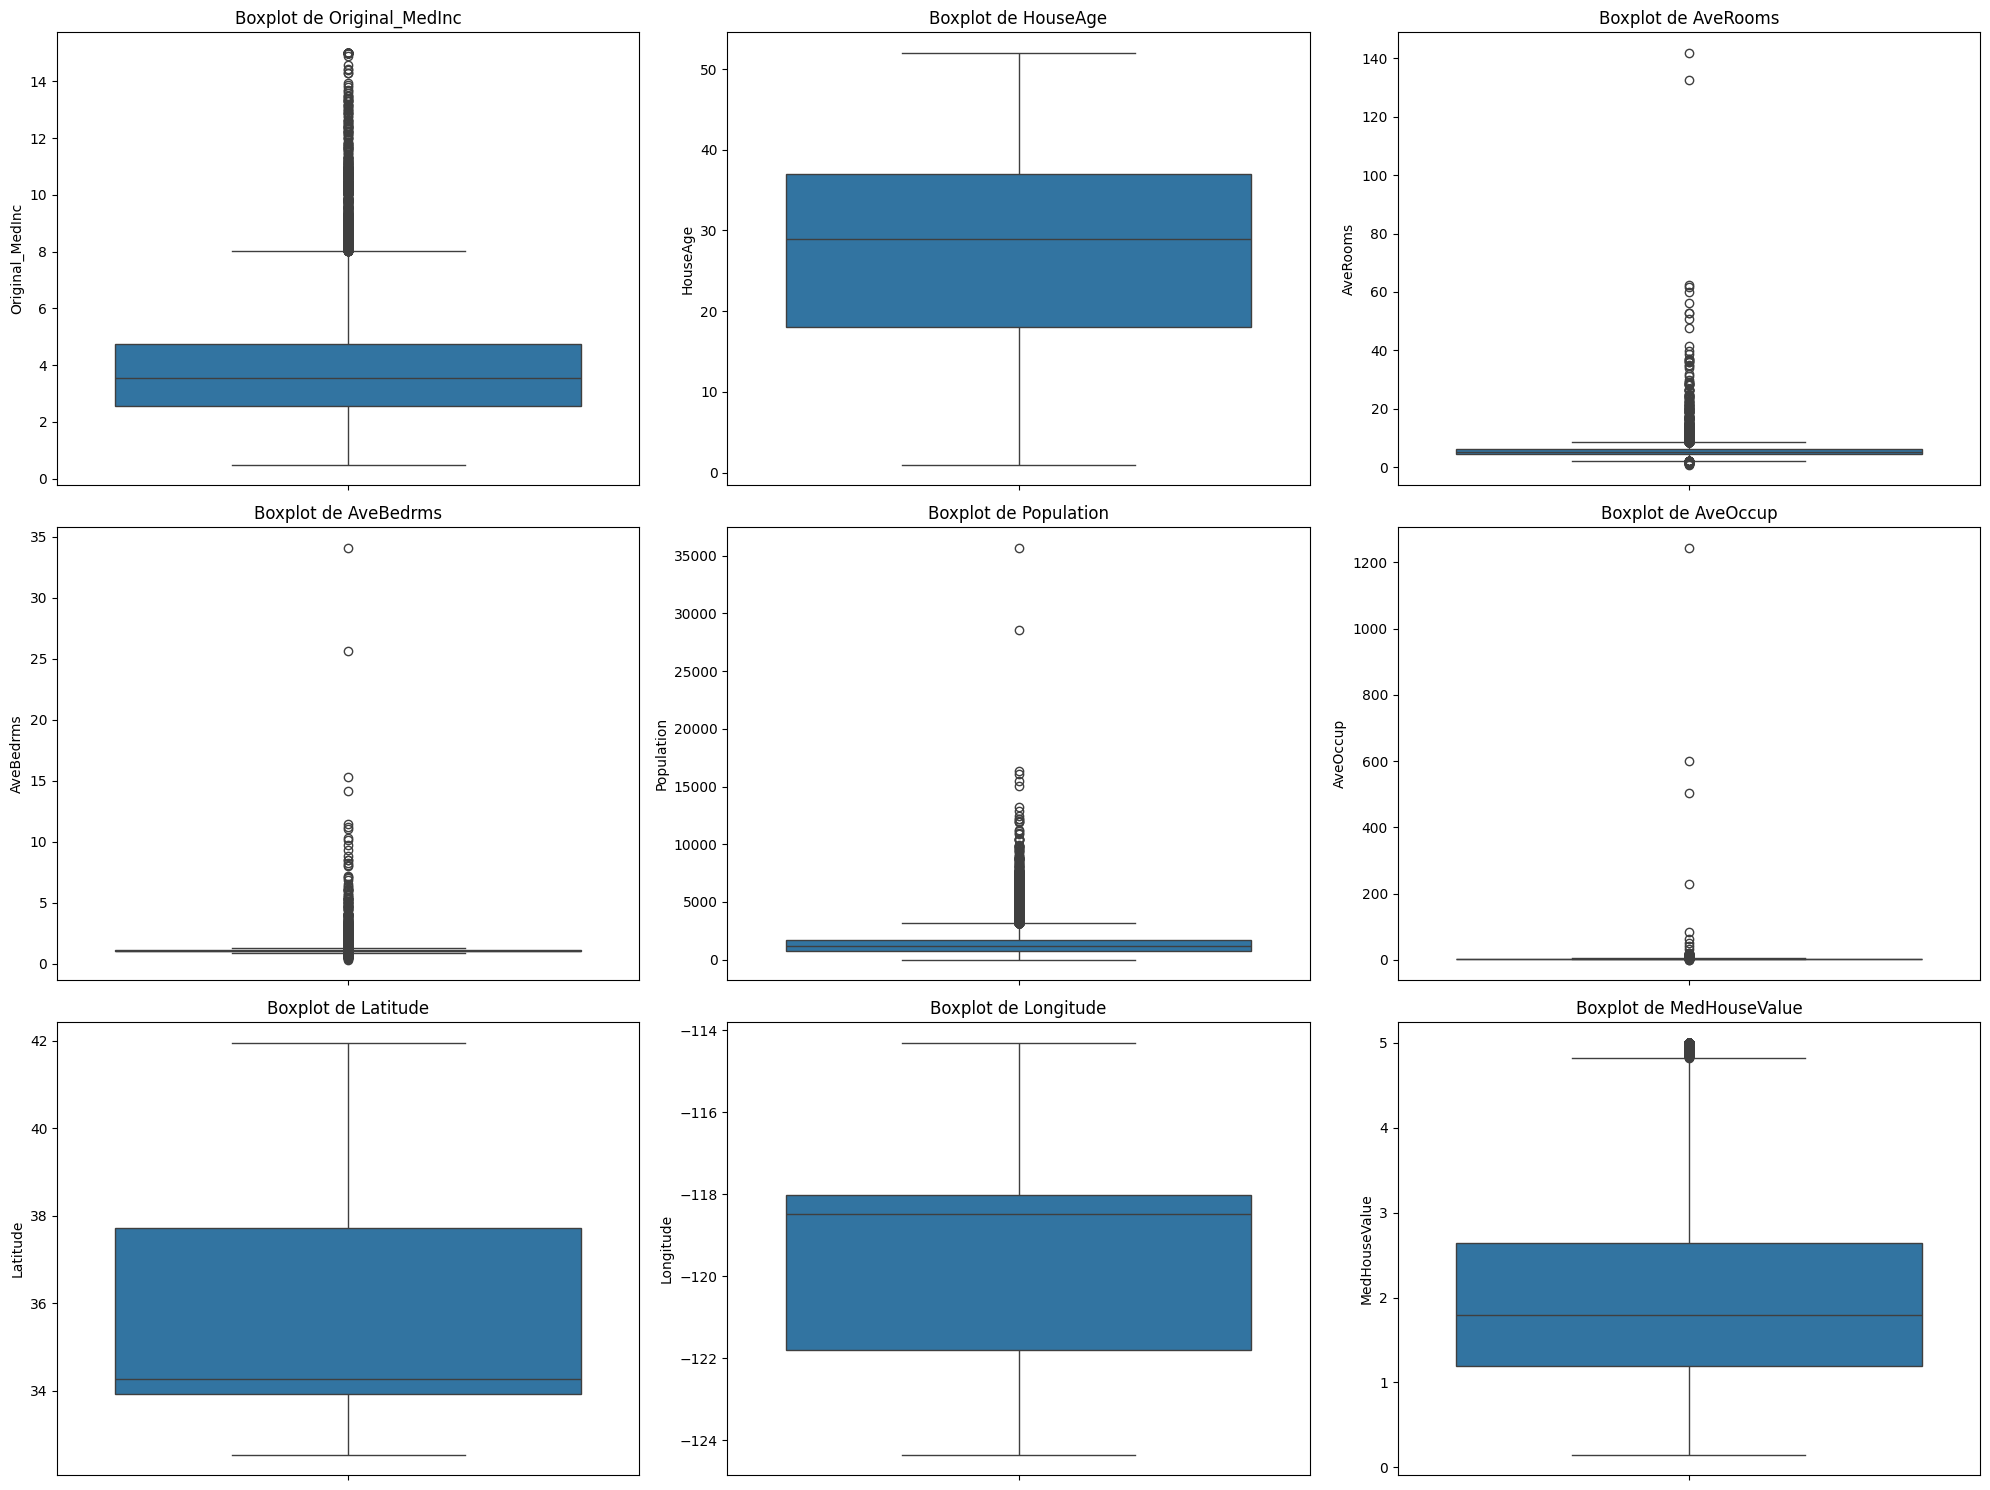

In [44]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1) # Ajuster le nombre de sous-graphes si plus de 9 colonnes
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

#### Scatter-plots prix vs variables clés

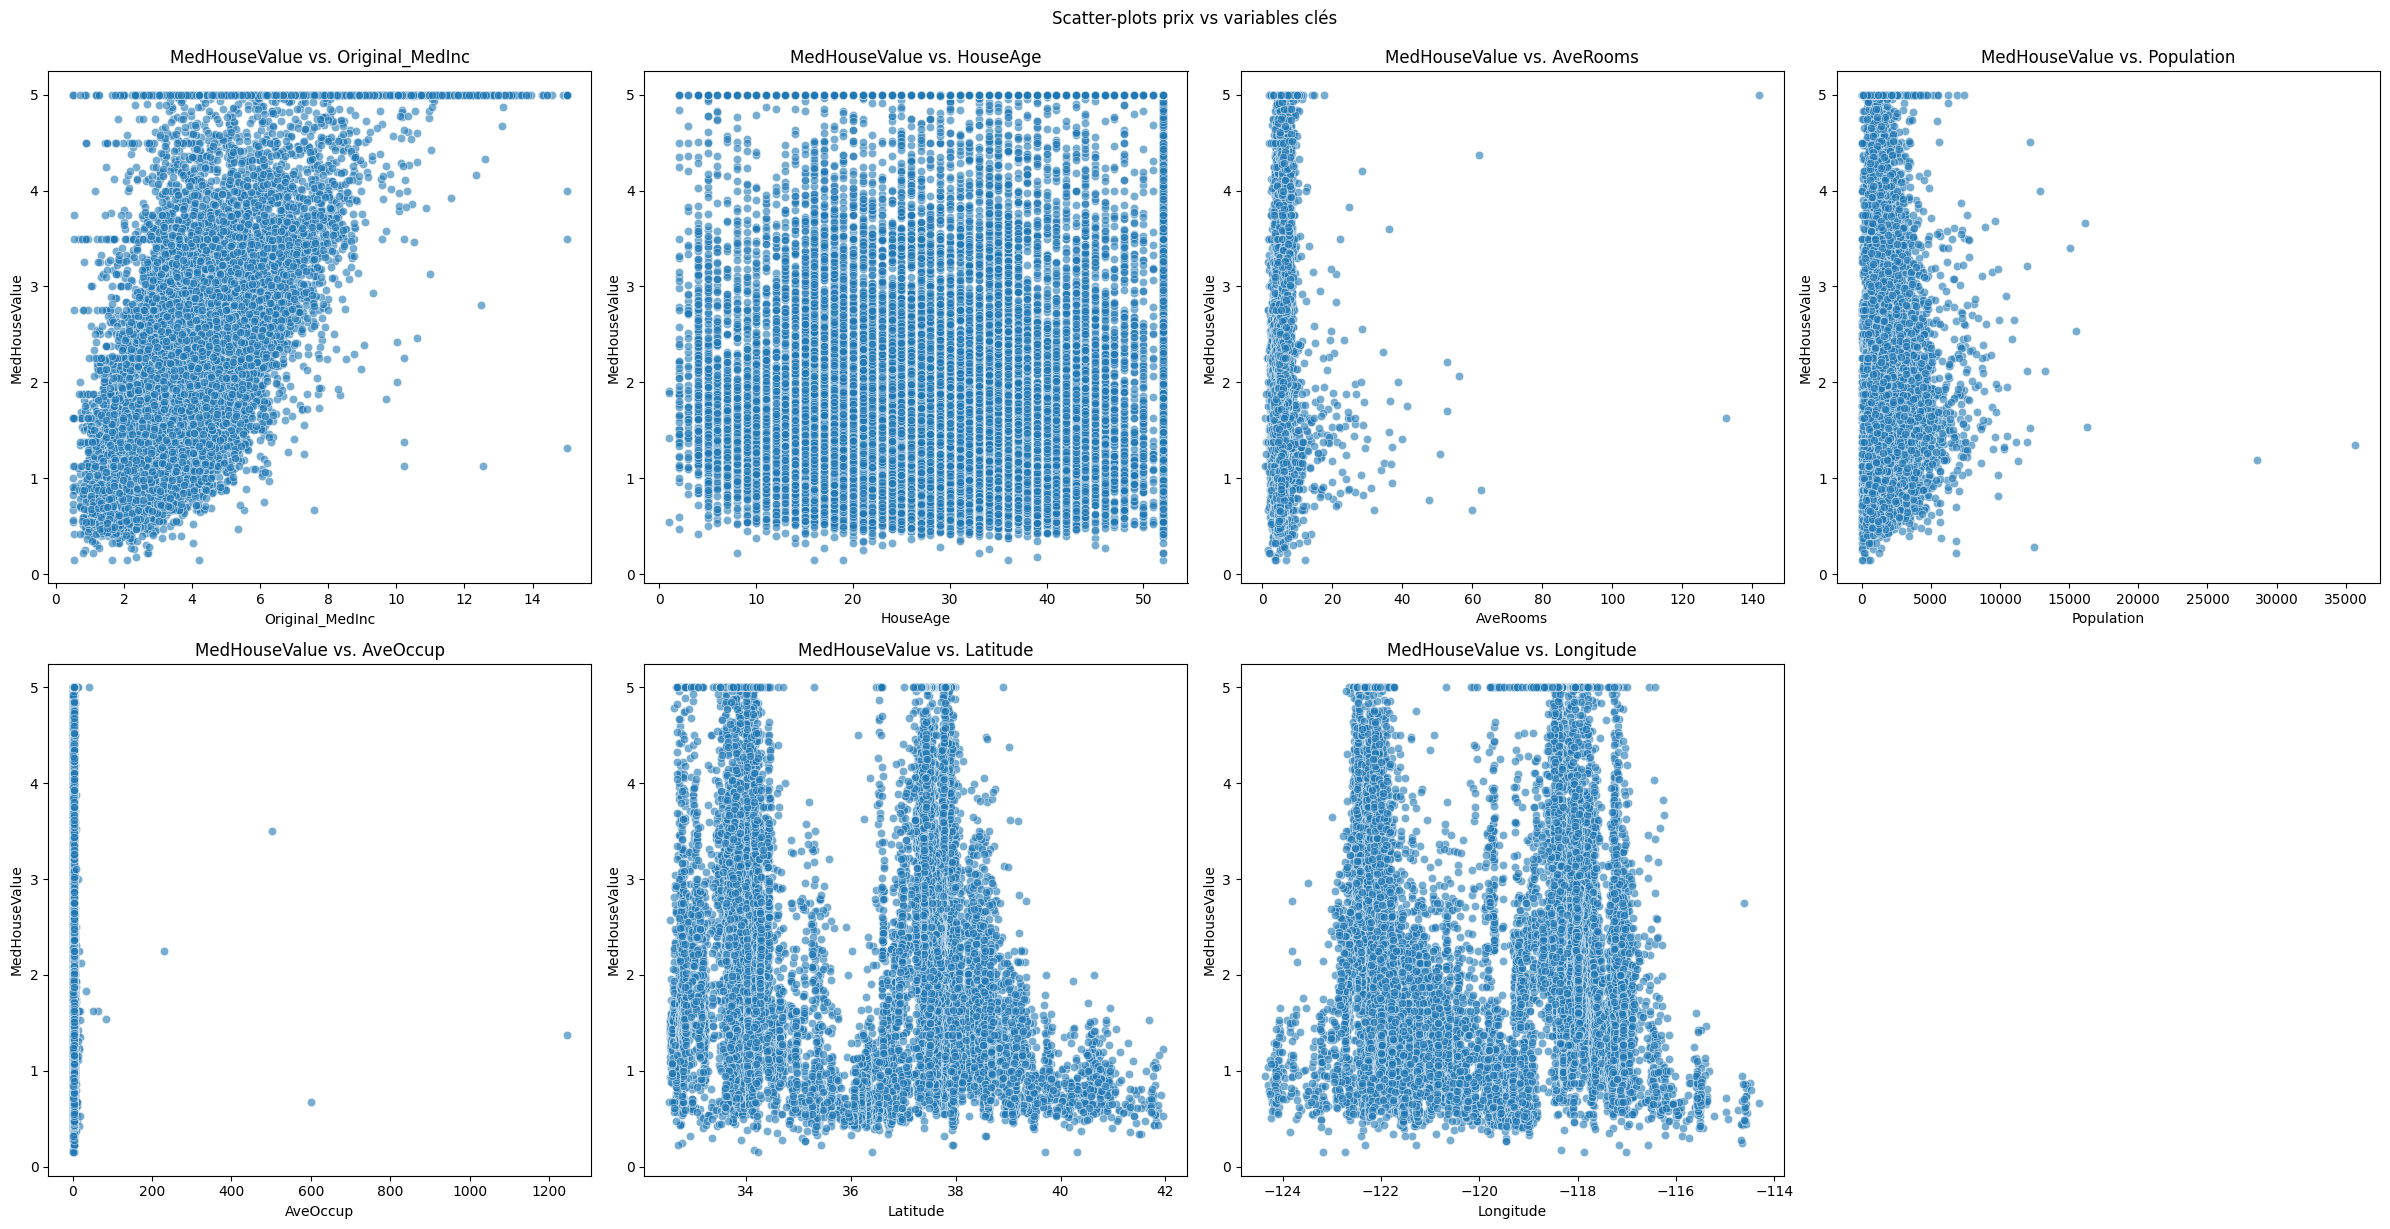

In [45]:
key_features = ['Original_MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
# Affiche le graphique et bloque l'exécution jusqu'à ce que la fenêtre soit fermée
# Créer une figure et des axes pour les subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12)) # Ajuster la grille si besoin
axes = axes.flatten() # Pour itérer facilement sur les axes

for i, feature in enumerate(key_features):
    if i < len(axes): # S'assurer de ne pas dépasser le nombre d'axes disponibles
        sns.scatterplot(x=df[feature], y=df['MedHouseValue'], alpha=0.6, ax=axes[i])
        axes[i].set_title(f'MedHouseValue vs. {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('MedHouseValue')

# Masquer les axes non utilisés si le nombre de features n'est pas un multiple de 4
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Scatter-plots prix vs variables clés", y=1.02) # Titre global
plt.show()

#### Matrice de Corrélatio

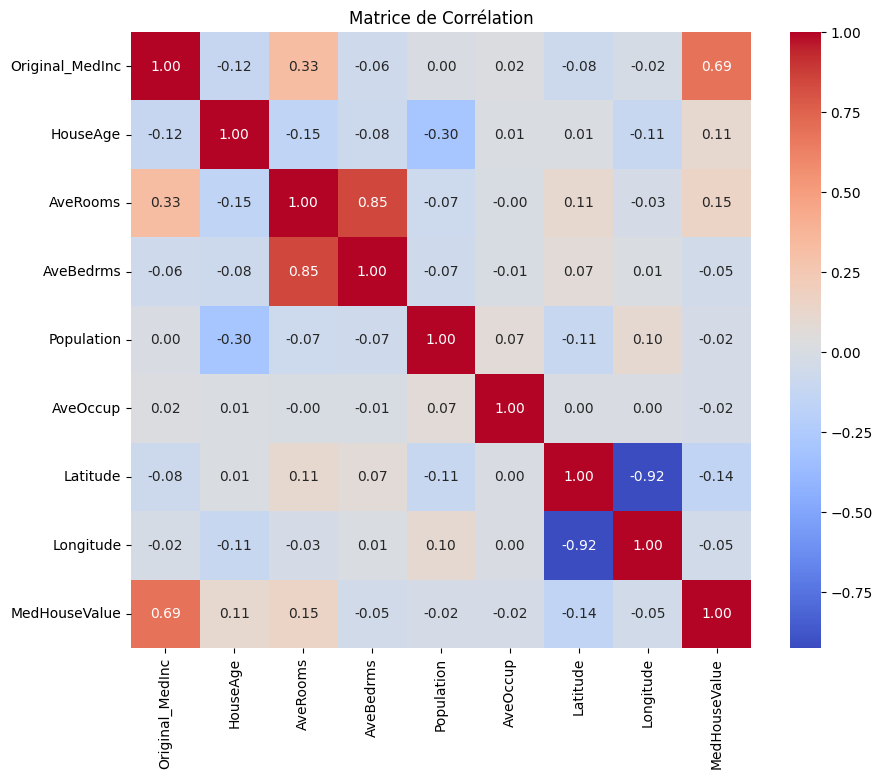

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()